In [57]:
from tensorflow import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline


In [58]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexes
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()
        

In [59]:
# Dataset

# Loading dataset
dataset = keras.datasets.mnist.load_data()


# Description of dataset
print("Num. of images in training data set : "+str(len(dataset[0][0])))
print("Num. of labels in training data set : "+str(len(dataset[0][1])))
print("Num. of images in testing data set : "+str(len(dataset[1][0])))
print("Num. of labels in testing data set : "+str(len(dataset[1][1])))

Num. of images in training data set : 60000
Num. of labels in training data set : 60000
Num. of images in testing data set : 10000
Num. of labels in testing data set : 10000


In [60]:
# Training dataset shape
print(dataset[0][0].shape)
#Testing data set shape
print(dataset[1][0].shape)

# Each image is of shape 28x28
print(dataset[0][0][0].shape)
# print("___________________")

(60000, 28, 28)
(10000, 28, 28)
(28, 28)


Randomly printing 10 images with labels from training dataset
index: 22901
Lable: 2


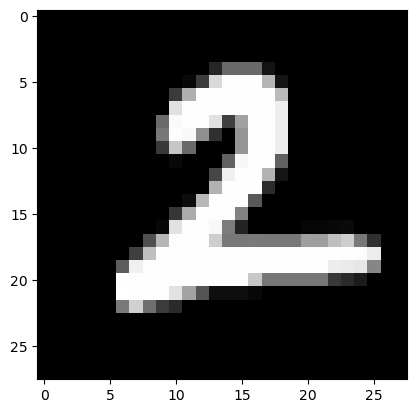

index: 49557
Lable: 1


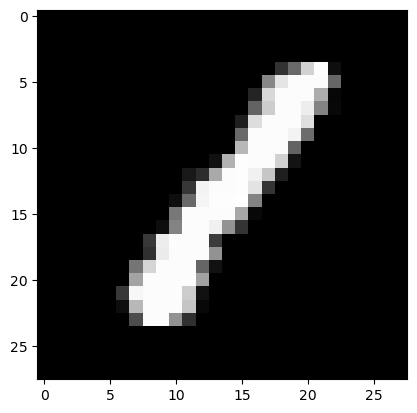

index: 22700
Lable: 1


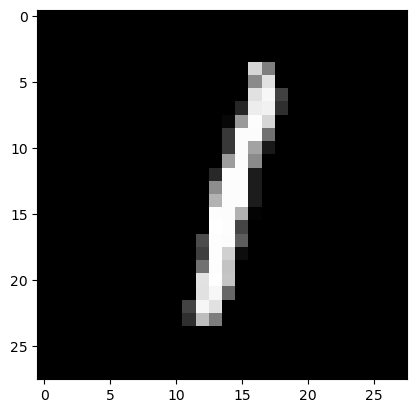

index: 20639
Lable: 8


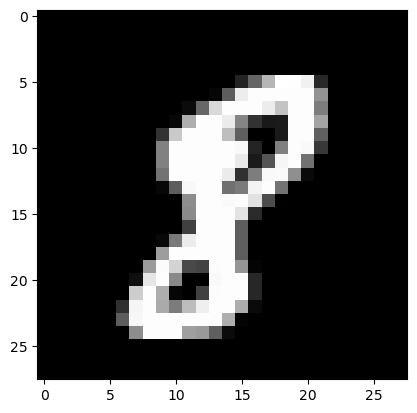

index: 44019
Lable: 2


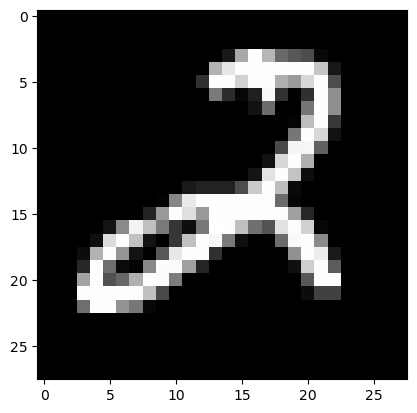

index: 55023
Lable: 0


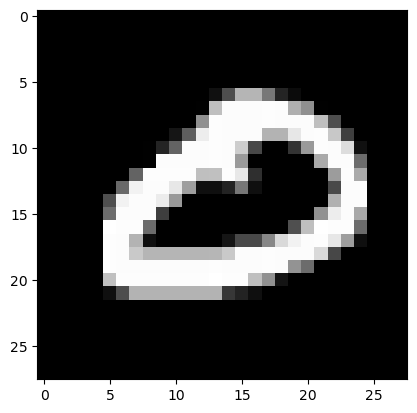

index: 31941
Lable: 4


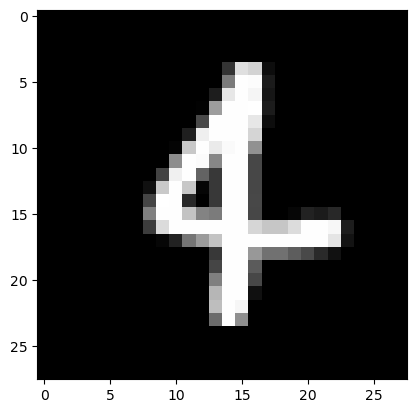

index: 55404
Lable: 2


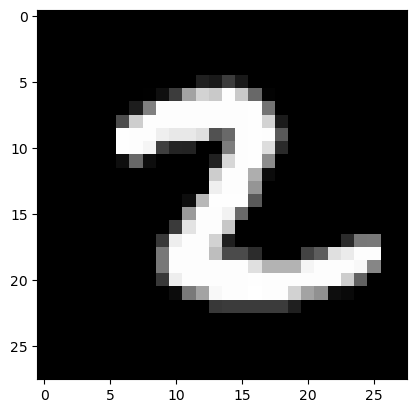

index: 1426
Lable: 9


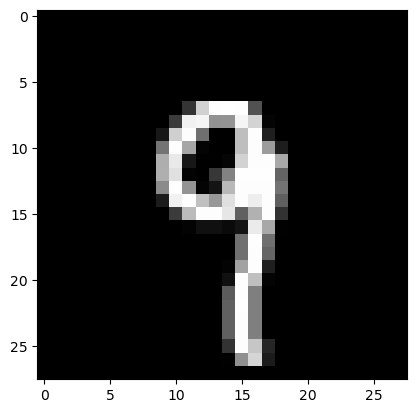

index: 7733
Lable: 9


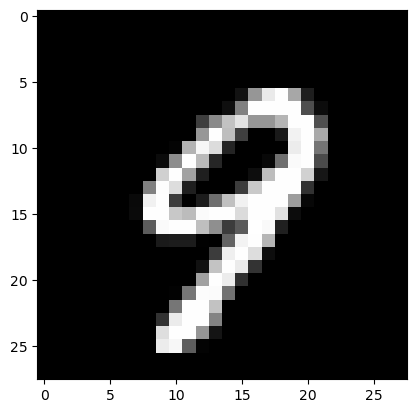

___________________


In [61]:
# second element of both training and testing (dataset[0][1] and dataset[0][1])
# represnts labels of the images, presents on the same index in images
# For example dataset[0][0][0] is an image in training dataset
# and dataset[0][1][0] is the label of same image is training dataset
#printing 10 random images with labels from training dataset
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])
print("___________________")

Randomly printing 10 images with labels from testing dataset
index: 315
Lable: 9


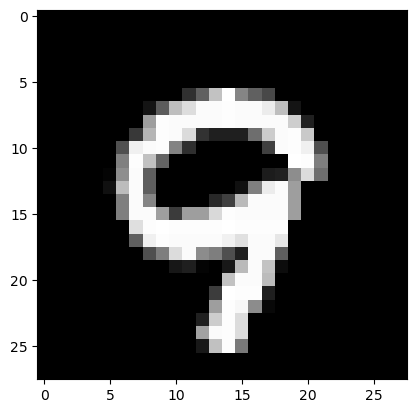

index: 1700
Lable: 0


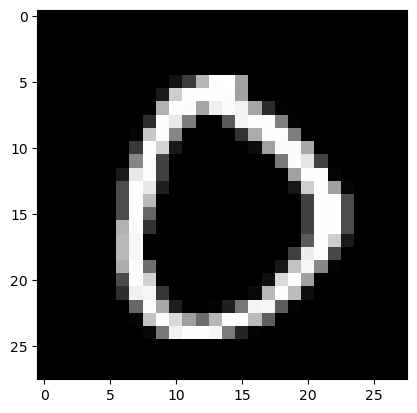

index: 9786
Lable: 5


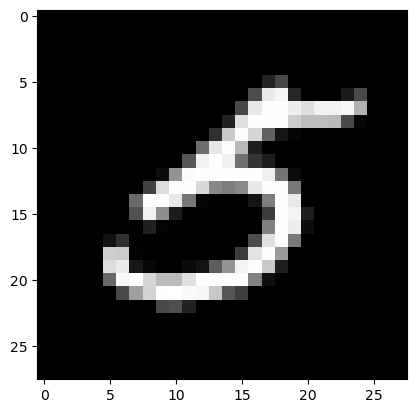

index: 8241
Lable: 8


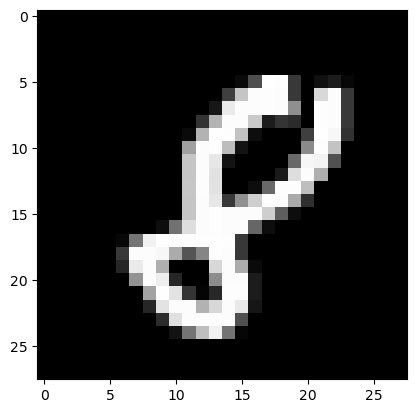

index: 2372
Lable: 7


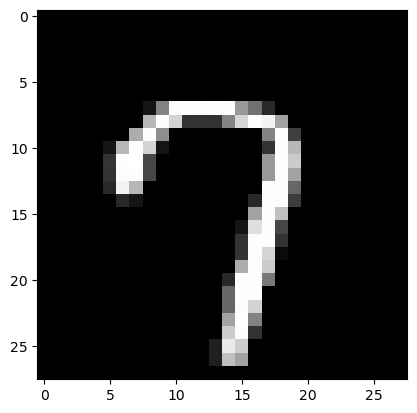

index: 7385
Lable: 0


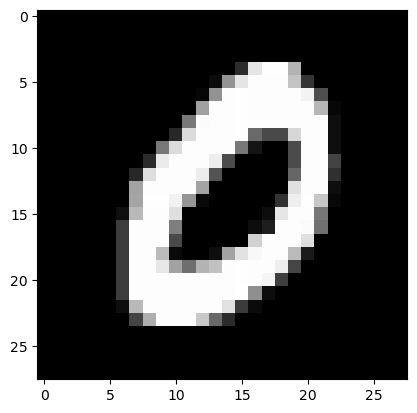

index: 245
Lable: 3


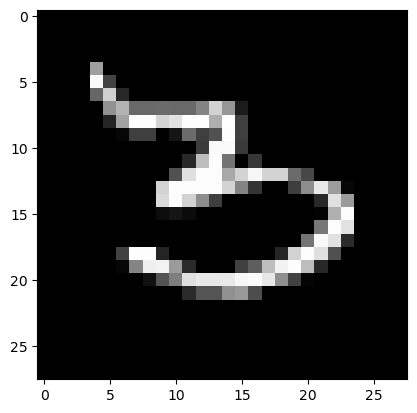

index: 4151
Lable: 7


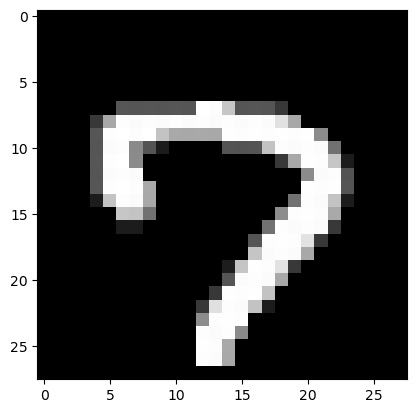

index: 2256
Lable: 4


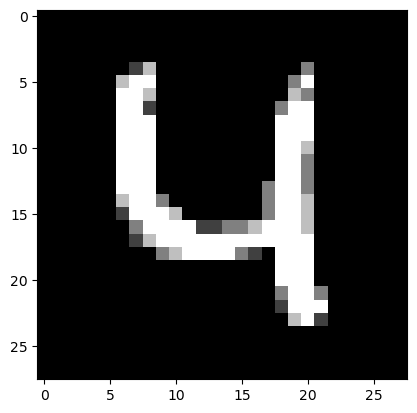

index: 3859
Lable: 9


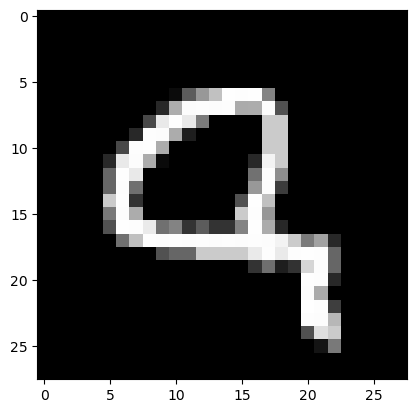

___________________


In [62]:
#printing 10 random images with labels from training dataset

print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(dataset[1])
print("___________________")

In [63]:
# Printing num. of labels in both data subsets

print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")
print("___________________")

There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset
___________________


In [64]:
#printing unique set data about labels for both sub sets of dataset

print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))
print("There are", len(set(dataset[1][1])),"unique classes in validation/testing dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))
print("__________")

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation/testing dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

__________


In [65]:
# Task

# You have to reduce the size of this dataset by 10 times.
# There are currently almost 5000 to 6000 thousand images (total: 60000) for each label in training
# and almost 1000 images (total: 10000) for each label in testing dataset.
# You are required to reduce this training dataset so that it will have exactly 600 images for each label (total: 6000) in training
# dataset and exactly 100 images for each label in testing dataset (total: 1000)
# new dataset should be stored into new_dataset variable name and should have exactly same format as the original dataset
# Your code here

new_training_img_dataset=[]# x_train[0][0]
new_training_label_dataset=[]# y_train[0][1]
new_testing_img_dataset=[]# x_test[1][0]
new_testing_label_dataset=[]# y_test[1][1]

for label in range(10):
    label_index_train=np.where(dataset[0][1]==label)[0]
    label_index_test=np.where(dataset[1][1]==label)[0]
    
    #600 indexes appended to training dataset
    new_training_img_dataset.extend(dataset[0][0][label_index_train[:600]])
    new_training_label_dataset.extend(dataset[0][1][label_index_train[:600]])
    #100 indexes appended to testing dataset
    new_testing_img_dataset.extend(dataset[1][0][label_index_test[:100]])
    new_testing_label_dataset.extend(dataset[1][1][label_index_test[:100]])
    
new_training_img_dataset=np.array(new_training_img_dataset)  # x_train[0][0]
new_training_label_dataset=np.array(new_training_label_dataset)  # y_train[0][1]
new_testing_img_dataset=np.array(new_testing_img_dataset)  # x_test[1][0]
new_testing_label_dataset=np.array(new_testing_label_dataset)  # y_test[1][1]

new_dataset = ((new_training_img_dataset, new_training_label_dataset), (new_testing_img_dataset, new_testing_label_dataset))

(28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________
There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

___________________
Randomly printing 10 images with labels from training dataset
index: 4005
Lable: 6


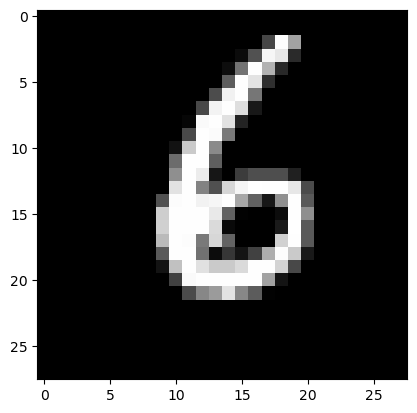

index: 3069
Lable: 5


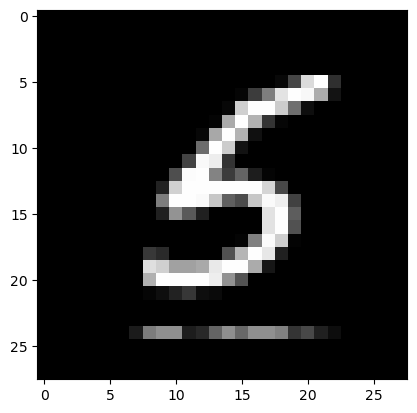

index: 4186
Lable: 6


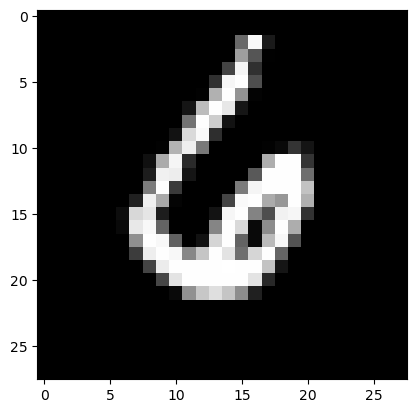

index: 1947
Lable: 3


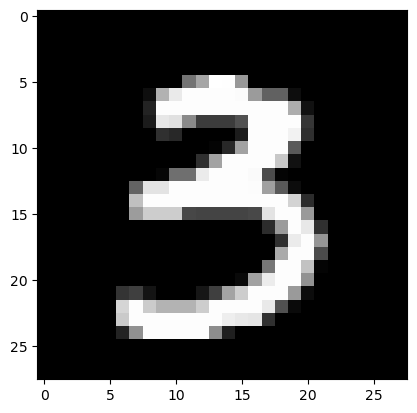

index: 5193
Lable: 8


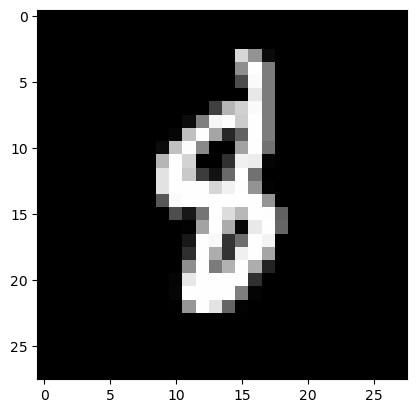

index: 1420
Lable: 2


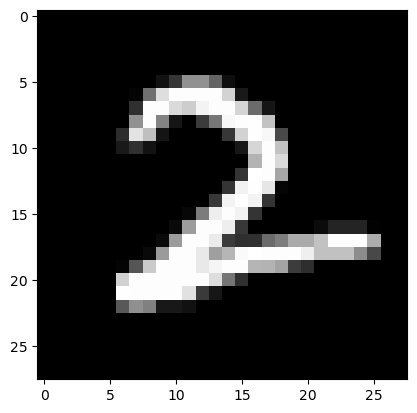

index: 543
Lable: 0


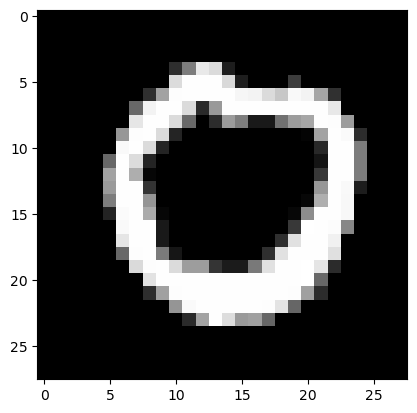

index: 1073
Lable: 1


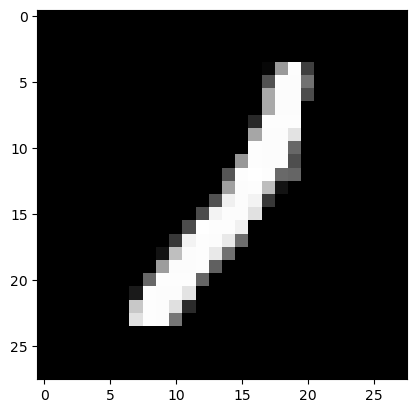

index: 3757
Lable: 6


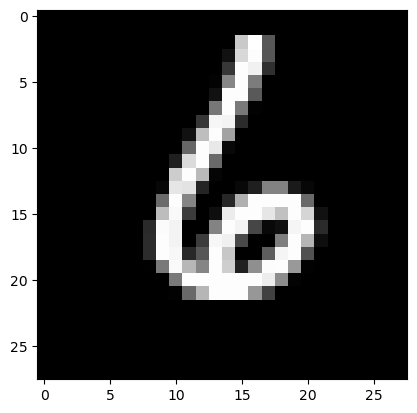

index: 3644
Lable: 6


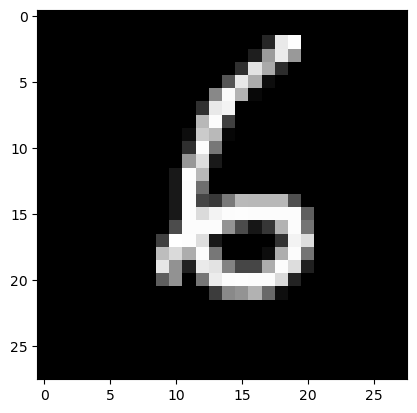

___________________
Randomly printing 10 images with labels from testing dataset
index: 1425
Lable: 2


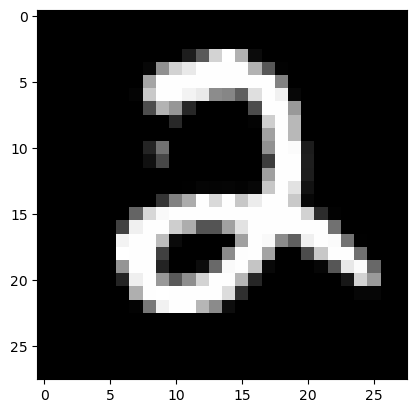

index: 25
Lable: 0


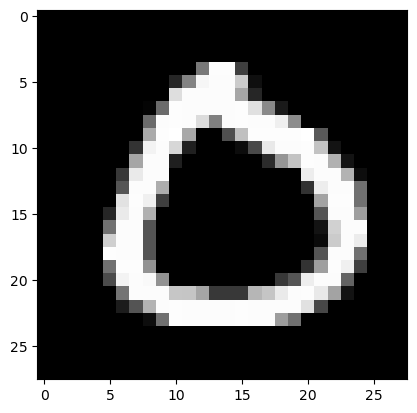

index: 3028
Lable: 5


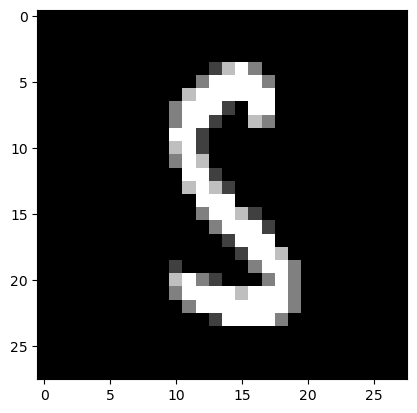

index: 1081
Lable: 1


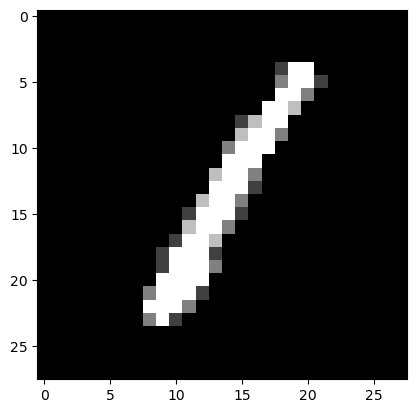

index: 1217
Lable: 2


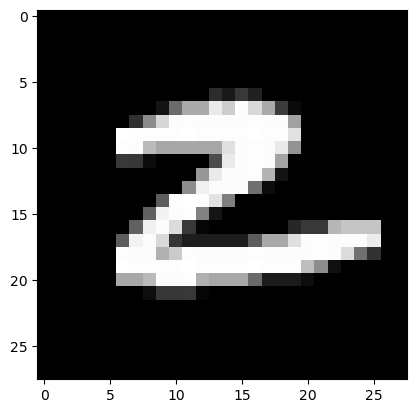

index: 811
Lable: 1


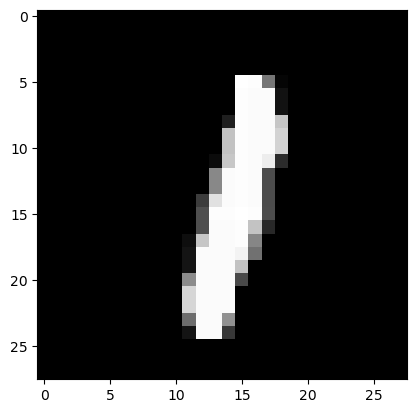

index: 3859
Lable: 6


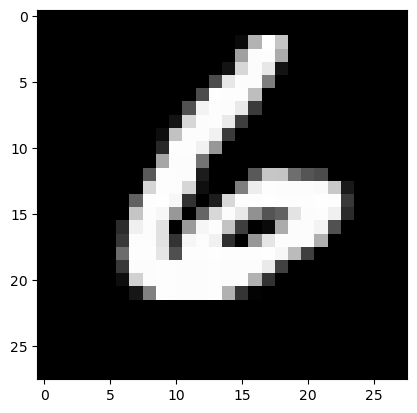

index: 3572
Lable: 5


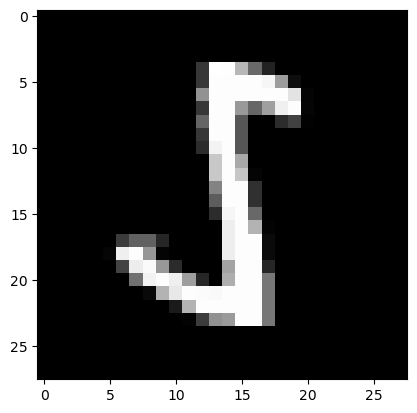

index: 387
Lable: 0


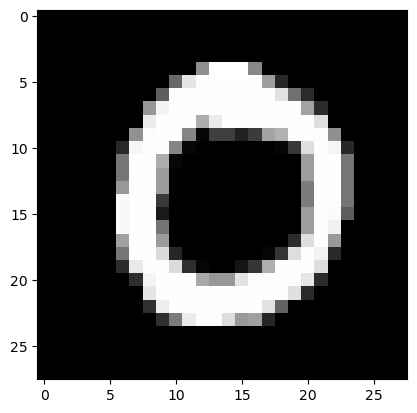

index: 3107
Lable: 5


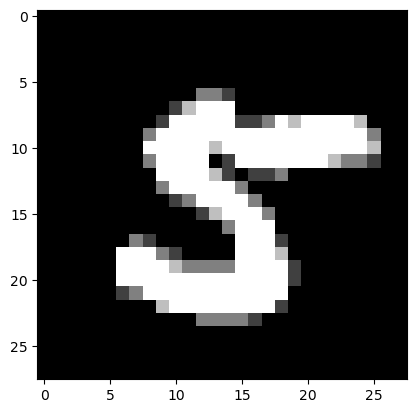

_____________


In [66]:

# Validation of Task

# Checking the shape of first image in new training dataset
print(new_dataset[0][0][0].shape)
print("___________________")


# Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")
print("___________________")


# Excepted output
# There are 6000 labels in training dataset for 6000 images in training dataset
# There are 1000 labels in training dataset for 1000 images in training dataset

# Checking the number of images per class
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))
print("___________________")
      
      
# Expected output
# There are 10 unique classes in training dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 600,
#          1: 600,
#          2: 600,
#          3: 600,
#          4: 600,
#          5: 600,
#          6: 600,
#          7: 600,
#          8: 600,
#          9: 600})
# There are 10 unique classes in validation dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 100,
#          1: 100,
#          2: 100,
#          3: 100,
#          4: 100,
#          5: 100,
#          6: 100,
#          7: 100,
#          8: 100,
#          9: 100})




# Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________")
      
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(new_dataset[0])
print("_____________")